In [22]:
import numpy as np
import matplotlib.pyplot as plt
# import os
import random
from empirical_data import *
from optimized_random_response import *
from randomized_response import *
from repetitive_optimizer import *
from synthetic_dataset import *

IS_SYNTHETIC = True
# IS_UNIFORM = 
FILE_LOCATION = "/Users/sandarujayawardana/Downloads/celeba_anno/list_attr_celeba.txt"
TEST_AMOUNT = 0.7
MAX_UTILITY_ERR_ALOWED = 0.2

Attr_list = ["Male", "Attractive", '5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive'] #, 'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose', 'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair']#, 'Bushy_Eyebrows', 'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair', 'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open', 'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns', 'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings', 'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace', 'Wearing_Necktie', 'Young'] # ["Male", "Big_Nose"] #, "Gray_Hair", "Big_Nose", "Smiling"] #, "Gray_Hair"]
error_cal_type = "l2" # ["0_1", "l1", "l2"]

alphabet_dict = {}
dict_attr_node = {}
read_data = []

def error_cal(actual, perturbed, err_type = "0_1"):
    if isinstance(actual, str):
        actual = list(alphabet_dict.keys()).index(actual)
        perturbed = list(alphabet_dict.keys()).index(perturbed)
    # print(actual, perturbed)
    if err_type == "0_1":
        return 0 if (actual == perturbed) else 1
    elif err_type == "l1":
        return abs((actual)-(perturbed)) # np.linalg.norm(((actual)-(perturbed)), 1)
    elif err_type == "l2":
        return ((actual)-(perturbed))**2 #np.linalg.norm(((actual)-(perturbed)), 2)
    else:
        assert(f"Unknown error type {err_type}")

# Reading txt
with open(FILE_LOCATION, 'r') as txt_file:
    no_of_lines = int(txt_file.readline())
    fields = txt_file.readline()

    for i, attr in enumerate(fields.split()):
      dict_attr_node[attr] = i+1
    print(dict_attr_node)
    print(dict_attr_node.keys())

    # Create alphabet
    for i in range(no_of_lines):
        rows = txt_file.readline().split()
        single_row = ""
        for j in Attr_list:
            single_row += " " + rows[dict_attr_node[j]]
        read_data.append(single_row)

for i in read_data:
    if i not in alphabet_dict.keys():
        alphabet_dict[i] = 1
    else:
        alphabet_dict[i] += 1

for key in alphabet_dict.keys():
    alphabet_dict[key] /= no_of_lines

prior_dist = np.array(list(alphabet_dict.values())) # np.ones(len(alphabet_dict))/len(alphabet_dict)# 

print(prior_dist, alphabet_dict)

TEST_LENGTH = int(TEST_AMOUNT * no_of_lines)
START_INDEX = random.randint(0, no_of_lines - TEST_LENGTH)# Starting index of test set
END_INDEX = START_INDEX + TEST_LENGTH - 1

{'5_o_Clock_Shadow': 1, 'Arched_Eyebrows': 2, 'Attractive': 3, 'Bags_Under_Eyes': 4, 'Bald': 5, 'Bangs': 6, 'Big_Lips': 7, 'Big_Nose': 8, 'Black_Hair': 9, 'Blond_Hair': 10, 'Blurry': 11, 'Brown_Hair': 12, 'Bushy_Eyebrows': 13, 'Chubby': 14, 'Double_Chin': 15, 'Eyeglasses': 16, 'Goatee': 17, 'Gray_Hair': 18, 'Heavy_Makeup': 19, 'High_Cheekbones': 20, 'Male': 21, 'Mouth_Slightly_Open': 22, 'Mustache': 23, 'Narrow_Eyes': 24, 'No_Beard': 25, 'Oval_Face': 26, 'Pale_Skin': 27, 'Pointy_Nose': 28, 'Receding_Hairline': 29, 'Rosy_Cheeks': 30, 'Sideburns': 31, 'Smiling': 32, 'Straight_Hair': 33, 'Wavy_Hair': 34, 'Wearing_Earrings': 35, 'Wearing_Hat': 36, 'Wearing_Lipstick': 37, 'Wearing_Necklace': 38, 'Wearing_Necktie': 39, 'Young': 40}
dict_keys(['5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive', 'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose', 'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows', 'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair', 'Heavy_M

In [23]:
# Initialize RR
rr_mechanism = Randomized_Response(len(alphabet_dict.keys()), list(alphabet_dict.keys()))

In [ ]:
# print(rr_mechanism.INPUT_ALPHABET)

In [3]:

error_list = []
squared_error_list = []
var_err_sum_dict = {}
var_err_sum_count_dict = {}
eps_array = np.arange(10)*0.8

for eps in eps_array:
    total_error = 0
    total_squared_error = 0
    perturbed_output_list = []
    for i in list(alphabet_dict.keys()):
        var_err_sum_dict[i] = 0
        var_err_sum_count_dict[i] = 0
    for i in read_data[START_INDEX:END_INDEX]:
        perturbed_output_list.append(rr_mechanism.gen_random_output(actual_value=i, eps=eps))
        total_error += error_cal(actual=i, perturbed=perturbed_output_list[-1], err_type=error_cal_type) 
        var_err_sum_dict[i] += error_cal(actual=i, perturbed=perturbed_output_list[-1], err_type=error_cal_type)
        var_err_sum_count_dict[i] += 1
    # error_list.append(total_error/(END_INDEX-START_INDEX))
    for i in list(alphabet_dict.keys()):
        total_squared_error += ((var_err_sum_dict[i]/var_err_sum_count_dict[i])**2)*(var_err_sum_count_dict[i]/(END_INDEX-START_INDEX))
    squared_error_list.append(total_squared_error)
    error_list.append(total_error/(END_INDEX-START_INDEX))
rr_eps_array, rr_error_list = eps_array, error_list

rr_var_list = []

for i in range(len(eps_array)):
    rr_var_list.append(squared_error_list[i]-error_list[i]**2) # MAX_UTILITY_ERR_ALOWED**2) #error_list[i]**2)

# plt.plot(eps_array, error_list)
# # plt.legend(["training_joint_prob vs perturbed", "test_joint_prob vs perturbed"], loc ="upper left")
# plt.xlabel("Epsilon")
# plt.ylabel("Error (Normalized)")
# plt.title(f"{error_cal_type} error between original value and perturbed value for {Attr_list}")
# plt.show()

KeyboardInterrupt: 

In [24]:
def generate_normalized_err_matrix(dimension, err_type = "0_1", normalized = True):
    value_array = np.arange(dimension)
    normalized_err_matrix = np.zeros((dimension, dimension))
    for i in value_array:
        for j in value_array:
            normalized_err_matrix[i][j] = error_cal(actual=i, perturbed=j, err_type=err_type)
    if normalized:
        normalized_err_matrix = normalized_err_matrix/np.max(normalized_err_matrix)
    # print(normalized_err_matrix, np.max(normalized_err_matrix))
    return normalized_err_matrix

# generate_normalized_err_matrix(8)

In [25]:
# Initialize optimize RR
optimal_rr_mechanism = Optimized_Randomized_Response(prior_dist = prior_dist, STATE_COUNT = len(alphabet_dict.keys()), INPUT_ALPHABET = list(alphabet_dict.keys()), normalized_objective_err_matrix = generate_normalized_err_matrix(len(alphabet_dict.keys()), err_type=error_cal_type), 
                 TOLERANCE_MARGIN = 0.01, APPROXIMATION = "LINEAR", solver = "SCS", is_kl_div = True, ALPHA=0.01)

In [92]:

error_list = []
squared_error_list = []
var_err_sum_dict = {}
var_err_sum_count_dict = {}


# eps_array = np.arange(15)*0.3

for eps in eps_array:
    total_error = 0
    total_squared_error = 0
    perturbed_output_list = []
    for i in list(alphabet_dict.keys()):
        var_err_sum_dict[i] = 0
        var_err_sum_count_dict[i] = 0

    for i in read_data[START_INDEX:END_INDEX]:
        perturbed_output_list.append(optimal_rr_mechanism.gen_random_output(actual_value=i, eps=eps))
        total_error += error_cal(actual=i, perturbed=perturbed_output_list[-1], err_type=error_cal_type) 
        var_err_sum_dict[i] += error_cal(actual=i, perturbed=perturbed_output_list[-1], err_type=error_cal_type)
        var_err_sum_count_dict[i] += 1
    error_list.append(total_error/(END_INDEX-START_INDEX))
    for i in list(alphabet_dict.keys()):
        total_squared_error += ((var_err_sum_dict[i]/var_err_sum_count_dict[i])**2)*(var_err_sum_count_dict[i]/(END_INDEX-START_INDEX))
    squared_error_list.append(total_squared_error)

var_list = []

for i in range(len(eps_array)):
    var_list.append(squared_error_list[i]-error_list[i]**2) # MAX_UTILITY_ERR_ALOWED**2) #error_list[i]**2)


0.0
0.8
1.6
2.4000000000000004
3.2
4.0
4.800000000000001
5.6000000000000005
6.4
7.2


In [93]:
repetitive_optimizer = Repetitive_optimizer(prior_dist=prior_dist, normalized_err_matrix=generate_normalized_err_matrix(len(alphabet_dict.keys()), err_type=error_cal_type), TOLERANCE_MARGIN = 0.001, APPROXIMATION = "LINEAR", STATE_COUNT = len(alphabet_dict.keys()))

[[0. 1.]
 [1. 0.]] 1.0


0.0
0.8
1.6
2.4000000000000004
3.2
4.0
4.800000000000001
5.6000000000000005
6.4
7.2


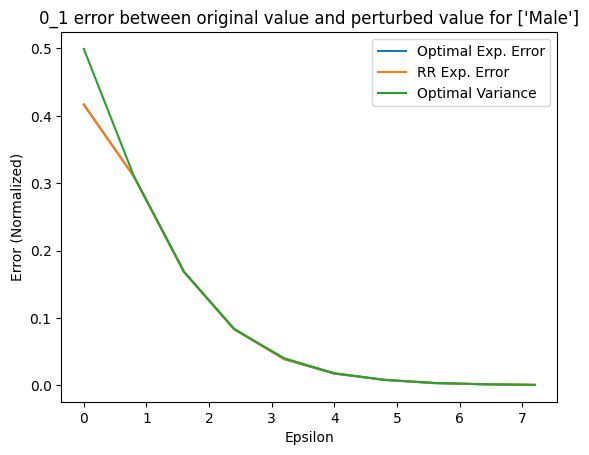

In [94]:
# repetitive_optimizer.history = []
# repetitive_optimizer.get_optimal_mechanism(MAX_UTILITY_ERR_ALOWED, optimal_rr_mechanism.optimizer)
# history = repetitive_optimizer.history

analytical_optimal_error = []
for eps in eps_array:
    analytical_optimal_error.append(optimal_rr_mechanism.get_expected_utility_error(eps=eps, input_probability=prior_dist))

plt.plot(eps_array, error_list)
plt.plot(eps_array, analytical_optimal_error)
# plt.fill_between(eps_array, np.array(error_list) - np.array(var_list)**0.5, np.array(error_list) + np.array(var_list)**0.5, alpha=0.2, label='Std Dev')
plt.plot(rr_eps_array, rr_error_list)
# plt.fill_between(eps_array, np.array(rr_error_list) - np.array(rr_var_list)**0.5, np.array(rr_error_list) + np.array(rr_var_list)**0.5, alpha=0.2, label='Std Dev')
# plt.plot(eps_array, np.array(var_list)**0.5)
# plt.plot(eps_array, np.array(rr_var_list)**0.5)
# plt.plot(eps_array, np.array(var_list))
# plt.plot(eps_array, np.array(rr_var_list))

lagend_list = ["Optimal Exp. Error", "RR Exp. Error", "Optimal Variance", "RR Variance"]

# for i in history[:-1]:
#     plt.scatter(i["eps"], i["util"], color='blue')

# plt.scatter(history[-1]["eps"], history[-1]["util"], color='red')

plt.legend(lagend_list)
plt.xlabel("Epsilon")
plt.ylabel("Error (Normalized)")
plt.title(f"{error_cal_type} error between original value and perturbed value for {Attr_list}")
plt.show()

In [8]:
'''
    Initialize JIDT software
    JIDT - https://github.com/jlizier/jidt

    Modified accordingly
'''

from jpype import *
import sys

JIDT_PATH = "/Users/sandarujayawardana/Downloads/infodynamics-dist-1.6.1/"

sys.path.append(JIDT_PATH + "demos/python")

if (not isJVMStarted()):
    # Add JIDT jar library to the path
    jarLocation = JIDT_PATH + "infodynamics.jar"
    # Start the JVM (add the "-Xmx" option with say 1024M if you get crashes due to not enough memory space)
    startJVM(getDefaultJVMPath(), "-ea", "-Djava.class.path=" + jarLocation, convertStrings=True)


In [55]:
'''
    Calculate pair-wise MI values

    Input: Data, calculate significance, estimator, time diff
    Output: List of pair-wise MI values
'''

def pair_wise_mutual_info(dataRaw, is_sign = False):
    
    if isinstance(dataRaw, np.ndarray):
        data = dataRaw
    else:
        data = np.array(dataRaw)


    source = JArray(JInt, 1)(data[:,0].tolist())
    destination = JArray(JInt, 1)(data[:,1].tolist())

    # 1. Construct the calculator:
    calcClass = JPackage("infodynamics.measures.discrete").MutualInformationCalculatorDiscrete
    calc = calcClass(2, 2, 0)
    # 2. No other properties to set for discrete calculators.
    # 3. Initialise the calculator for (re-)use:
    calc.initialise()
    # 4. Supply the sample data:
    calc.addObservations(source, destination)
    # 5. Compute the estimate:
    result = calc.computeAverageLocalOfObservations()
    return result


In [26]:
from simpleinfotheory import mutualinformationempirical

def mutual_info_cal(x, y):
    result, xySymbols, xyProbs, xSymbols, xProbs, ySymbols, yProbs =  mutualinformationempirical(x, y)
    # print(result, xySymbols, xyProbs, xSymbols, xProbs, ySymbols, yProbs)
    return result

0.0
0.0028937143730614068 [[' -1 -1 -1 -1 -1' ' -1 -1 -1 -1 -1']
 [' -1 -1 -1 -1 -1' ' -1 -1 -1 -1 1']
 [' -1 -1 -1 -1 -1' ' -1 -1 -1 1 -1']
 [' -1 -1 -1 -1 -1' ' -1 -1 -1 1 1']
 [' -1 -1 -1 -1 -1' ' -1 -1 1 -1 1']
 [' -1 -1 -1 -1 -1' ' 1 -1 -1 -1 -1']
 [' -1 -1 -1 -1 -1' ' 1 -1 -1 -1 1']
 [' -1 -1 -1 -1 -1' ' 1 -1 -1 1 -1']
 [' -1 -1 -1 -1 -1' ' 1 -1 -1 1 1']
 [' -1 -1 -1 -1 -1' ' 1 -1 1 -1 -1']
 [' -1 -1 -1 -1 -1' ' 1 -1 1 -1 1']
 [' -1 -1 -1 -1 -1' ' 1 -1 1 1 -1']
 [' -1 -1 -1 -1 -1' ' 1 -1 1 1 1']
 [' -1 -1 -1 -1 -1' ' 1 1 -1 -1 -1']
 [' -1 -1 -1 -1 -1' ' 1 1 -1 -1 1']
 [' -1 -1 -1 -1 -1' ' 1 1 -1 1 -1']
 [' -1 -1 -1 -1 -1' ' 1 1 1 -1 -1']
 [' -1 -1 -1 -1 -1' ' 1 1 1 1 -1']
 [' -1 -1 -1 -1 -1' ' 1 1 1 1 1']
 [' -1 -1 -1 -1 1' ' -1 -1 -1 -1 -1']
 [' -1 -1 -1 -1 1' ' -1 -1 -1 -1 1']
 [' -1 -1 -1 -1 1' ' -1 -1 -1 1 -1']
 [' -1 -1 -1 -1 1' ' -1 -1 -1 1 1']
 [' -1 -1 -1 -1 1' ' 1 -1 -1 -1 -1']
 [' -1 -1 -1 -1 1' ' 1 -1 -1 -1 1']
 [' -1 -1 -1 -1 1' ' 1 -1 -1 1 -1']
 [' -1 -1 -1 -1 1' ' 1

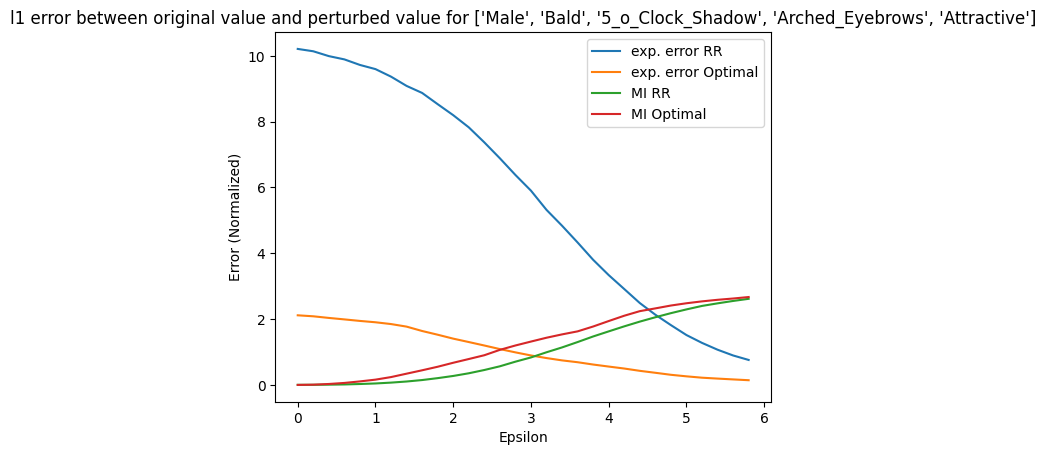

In [6]:

error_list = []
error_list_2 = []
squared_error_list = []
var_err_sum_dict = {}
var_err_sum_count_dict = {}
eps_array = np.arange(30)*0.2
MI_rr = []
MI_optimal = []
for eps in eps_array:
    total_error = 0
    total_error_2 = 0
    total_squared_error = 0
    perturbed_output_list = []
    optimal_perturbed_output_list = []
    for i in list(alphabet_dict.keys()):
        var_err_sum_dict[i] = 0
        var_err_sum_count_dict[i] = 0
    for i in read_data[START_INDEX:END_INDEX]:
        perturbed_output_list.append(rr_mechanism.gen_random_output(actual_value=i, eps=eps))
        optimal_perturbed_output_list.append(optimal_rr_mechanism.gen_random_output(actual_value=i, eps=eps))
        total_error += error_cal(actual=i, perturbed=perturbed_output_list[-1], err_type=error_cal_type) 
        total_error_2 += error_cal(actual=i, perturbed=optimal_perturbed_output_list[-1], err_type=error_cal_type) 
    MI_rr.append(mutual_info_cal(perturbed_output_list, read_data[START_INDEX:END_INDEX]))
    MI_optimal.append(mutual_info_cal(optimal_perturbed_output_list, read_data[START_INDEX:END_INDEX]))
    error_list.append(total_error/(END_INDEX-START_INDEX))
    error_list_2.append(total_error_2/(END_INDEX-START_INDEX))
rr_eps_array, rr_error_list = eps_array, error_list

rr_var_list = []


plt.plot(eps_array, error_list)
plt.plot(eps_array, error_list_2)
plt.plot(eps_array, MI_rr)
plt.plot(eps_array, MI_optimal)
# plt.legend(["training_joint_prob vs perturbed", "test_joint_prob vs perturbed"], loc ="upper left")
plt.xlabel("Epsilon")
plt.ylabel("Error (Normalized)")
plt.title(f"{error_cal_type} error between original value and perturbed value for {Attr_list}")
plt.legend(["exp. error RR", "exp. error Optimal", "MI RR", "MI Optimal"])
plt.show()

0.0
0.8
1.6
2.4000000000000004
3.2
4.0


/Users/sandarujayawardana/Documents/Python_code/.venv/lib/python3.11/site-packages/cvxpy/problems/problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


4.800000000000001
5.6000000000000005
6.4
7.2


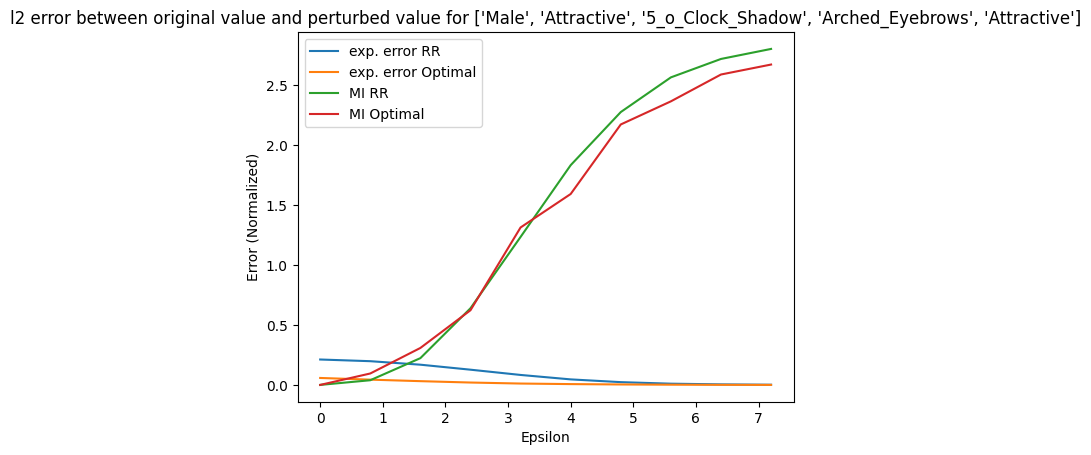

In [27]:
max_err_val = np.max(generate_normalized_err_matrix(len(alphabet_dict.keys()), err_type=error_cal_type, normalized=False))
error_list = []
error_list_2 = []
# squared_error_list = []
# var_err_sum_dict = {}
# var_err_sum_count_dict = {}
eps_array = np.arange(10)*0.8
MI_rr = []
MI_optimal = []
for eps in eps_array:
    total_error = 0
    total_error_2 = 0
    total_squared_error = 0
    perturbed_output_list = []
    optimal_perturbed_output_list = []
    # for i in list(alphabet_dict.keys()):
    #     var_err_sum_dict[i] = 0
    #     var_err_sum_count_dict[i] = 0
    for i in read_data[START_INDEX:END_INDEX]:
        perturbed_output_list.append(rr_mechanism.gen_random_output(actual_value=i, eps=eps))
        optimal_perturbed_output_list.append(optimal_rr_mechanism.gen_random_output(actual_value=i, eps=eps))
        total_error += error_cal(actual=i, perturbed=perturbed_output_list[-1], err_type=error_cal_type)/max_err_val
        total_error_2 += error_cal(actual=i, perturbed=optimal_perturbed_output_list[-1], err_type=error_cal_type) /max_err_val
    MI_rr.append(mutual_info_cal(perturbed_output_list, read_data[START_INDEX:END_INDEX]))
    MI_optimal.append(mutual_info_cal(optimal_perturbed_output_list, read_data[START_INDEX:END_INDEX]))
    error_list.append(total_error/(END_INDEX-START_INDEX))
    error_list_2.append(total_error_2/(END_INDEX-START_INDEX))
rr_eps_array, rr_error_list = eps_array, error_list

rr_var_list = []


plt.plot(eps_array, error_list)
plt.plot(eps_array, error_list_2)
plt.plot(eps_array, MI_rr)
plt.plot(eps_array, MI_optimal)
# plt.legend(["training_joint_prob vs perturbed", "test_joint_prob vs perturbed"], loc ="upper left")
plt.xlabel("Epsilon")
plt.ylabel("Error (Normalized)")
plt.title(f"{error_cal_type} error between original value and perturbed value for {Attr_list}")
plt.legend(["exp. error RR", "exp. error Optimal", "MI RR", "MI Optimal"])
plt.show()

In [12]:
max_err_val

1.0

p : [1.84048292e-01 1.26436952e-01 2.26501612e-01 2.12014867e-01
 4.36379252e-02 4.15599287e-03 6.45511577e-02 6.06468936e-02
 5.97880542e-02 4.73842418e-03 9.92601148e-03 3.45510096e-03
 2.96151511e-05 5.92303022e-05 9.87171704e-06]


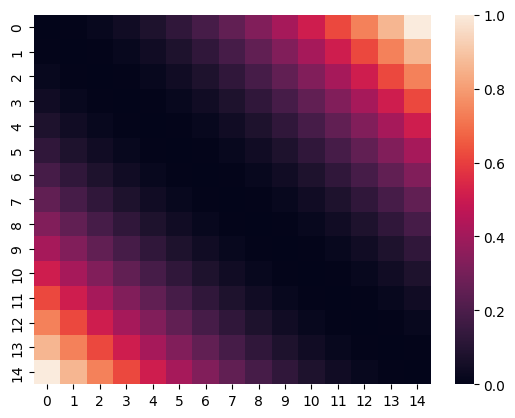

[[0.00000000e+00 9.39021900e-04 3.75608760e-03 8.45119710e-03
  1.50243504e-02 2.34755475e-02 3.38047884e-02 4.60120731e-02
  6.00974016e-02 7.60607739e-02 9.39021900e-02 1.13621650e-01
  1.35219154e-01 1.58694701e-01 1.84048292e-01]
 [6.45086489e-04 0.00000000e+00 6.45086489e-04 2.58034596e-03
  5.80577840e-03 1.03213838e-02 1.61271622e-02 2.32231136e-02
  3.16092380e-02 4.12855353e-02 5.22520056e-02 6.45086489e-02
  7.80554651e-02 9.28924544e-02 1.09019617e-01]
 [4.62248187e-03 1.15562047e-03 0.00000000e+00 1.15562047e-03
  4.62248187e-03 1.04005842e-02 1.84899275e-02 2.88905117e-02
  4.16023368e-02 5.66254029e-02 7.39597099e-02 9.36052578e-02
  1.15562047e-01 1.39830077e-01 1.66409347e-01]
 [9.73537654e-03 4.32683402e-03 1.08170850e-03 0.00000000e+00
  1.08170850e-03 4.32683402e-03 9.73537654e-03 1.73073361e-02
  2.70427126e-02 3.89415061e-02 5.30037167e-02 6.92293443e-02
  8.76183888e-02 1.08170850e-01 1.30886729e-01]
 [3.56227961e-03 2.00378228e-03 8.90569901e-04 2.22642475e-04
  

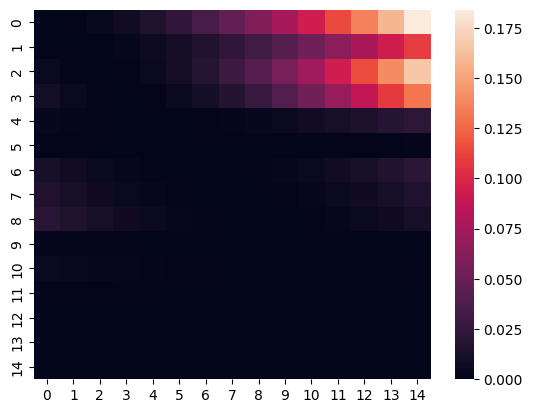

[0.07487423 0.05056676 0.03646338 0.03256407 0.03886885 0.05537771
 0.08209066 0.11900768 0.16612878 0.22345397 0.29098324 0.36871659
 0.45665402 0.55479553 0.66314113]
[0.06976439 0.07030466 0.07061812 0.07070479 0.07056466 0.07019773
 0.06960399 0.06878346 0.06773613 0.066462   0.06496107 0.06323334
 0.06127881 0.05909748 0.05668935]


In [28]:
import seaborn as sns

def approximated_mechanism(error_matrix, p_x):
    # print(error_matrix)
    print("p :", p_x)
    sns.heatmap(error_matrix)
    plt.show()

    for i in range(len(error_matrix[0])):
        error_matrix[:,i] = p_x*error_matrix[:,i]
    
    print(error_matrix)
    
    sns.heatmap(error_matrix)
    plt.show()
    sum_ = np.sum(error_matrix, axis=0)
    scale_ = 1 - sum_/np.sum(sum_)
    scale_ /= np.sum(scale_)
    print(sum_)
    print(scale_)
    
normalized_objective_err_matrix = generate_normalized_err_matrix(len(alphabet_dict.keys()), err_type=error_cal_type)
approximated_mechanism(error_matrix=normalized_objective_err_matrix, p_x=prior_dist)

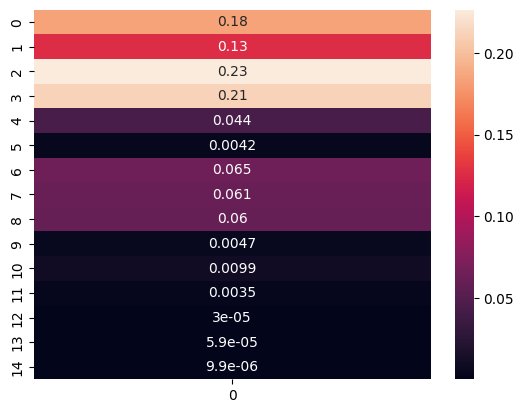

0.0
0.0


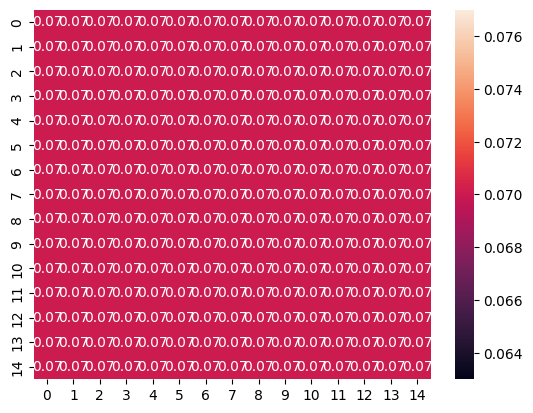

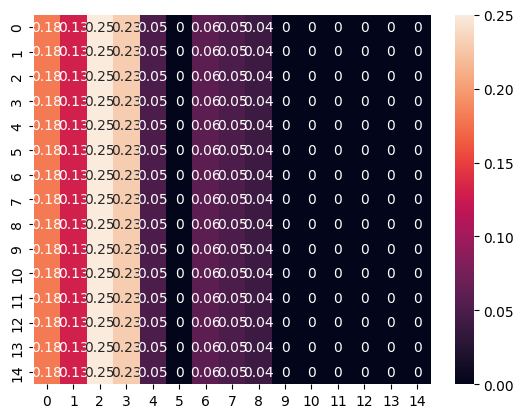

0.6
0.6


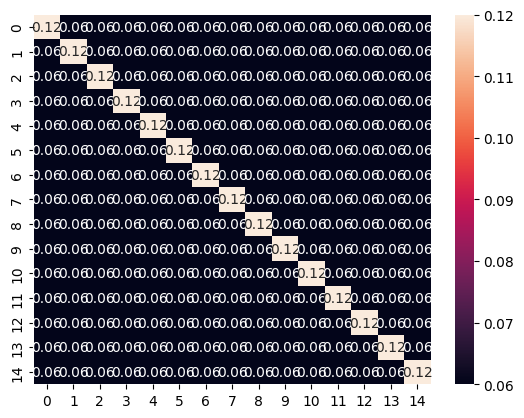

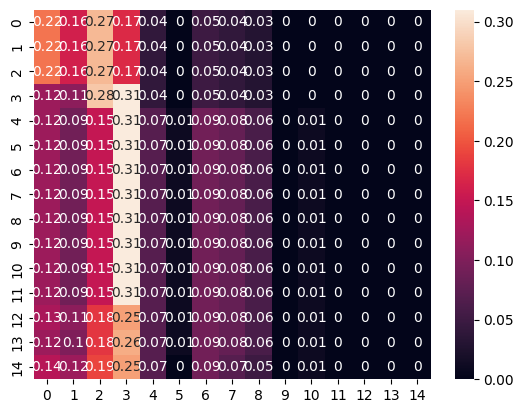

1.2
1.2


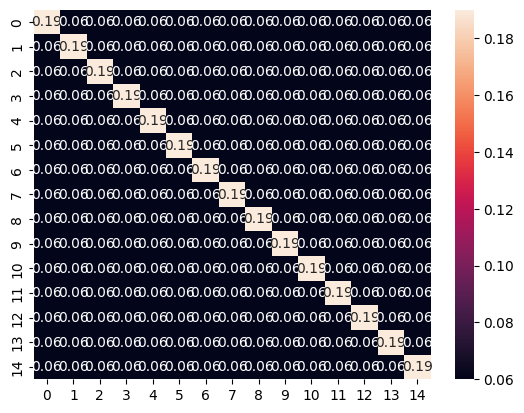

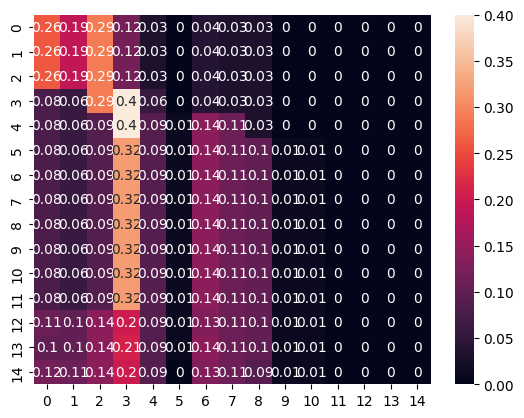

1.7999999999999998
1.7999999999999998


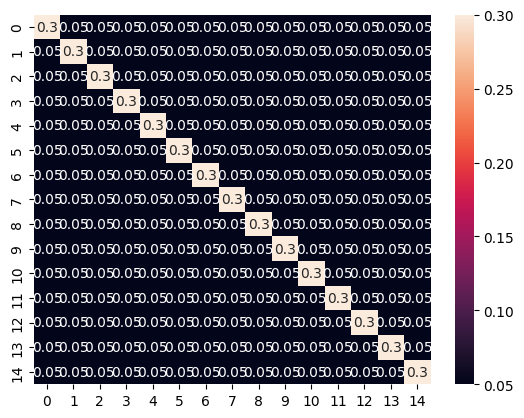

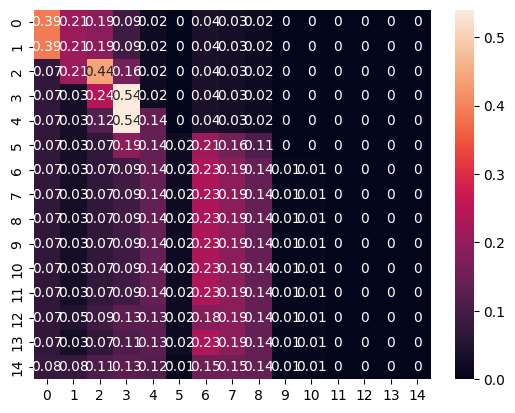

2.4
2.4


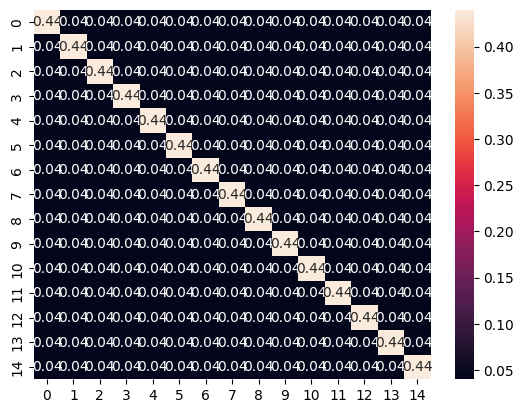

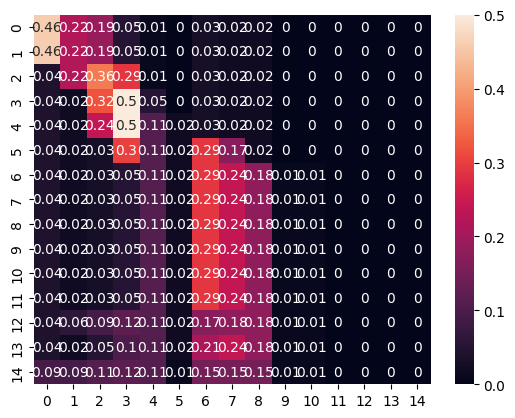

3.0
3.0


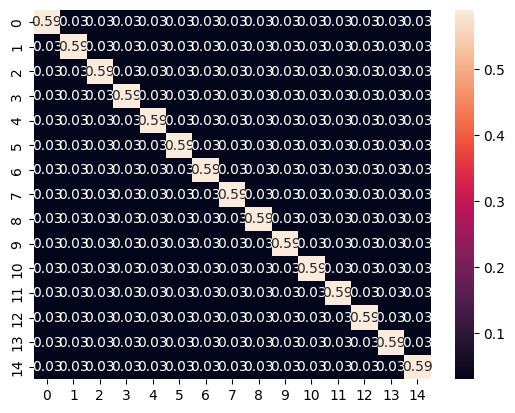

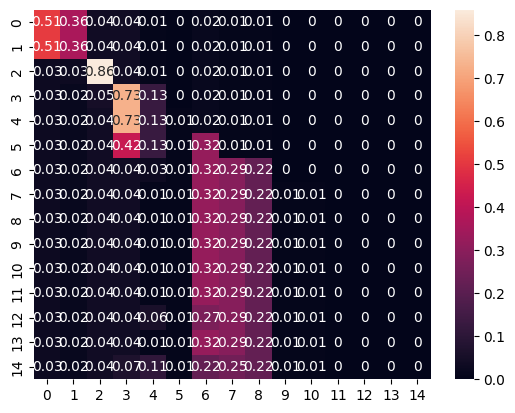

3.5999999999999996


/Users/sandarujayawardana/Documents/Python_code/.venv/lib/python3.11/site-packages/cvxpy/problems/problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


3.5999999999999996


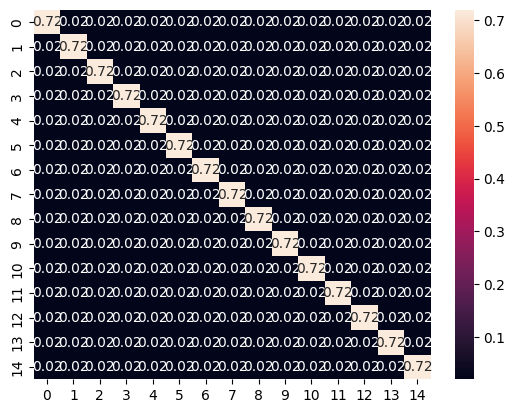

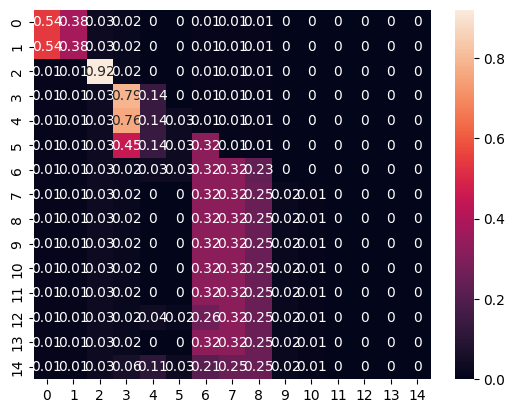

4.2


/Users/sandarujayawardana/Documents/Python_code/.venv/lib/python3.11/site-packages/cvxpy/problems/problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


4.2


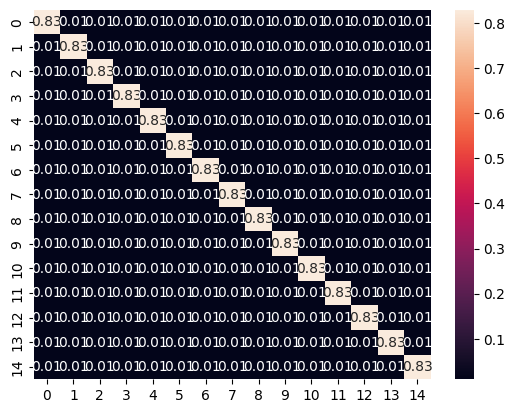

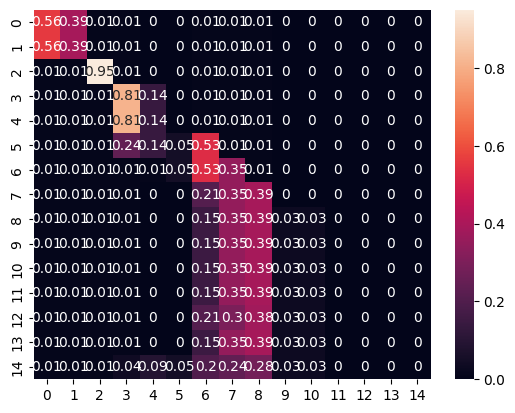

4.8


/Users/sandarujayawardana/Documents/Python_code/.venv/lib/python3.11/site-packages/cvxpy/problems/problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


4.8


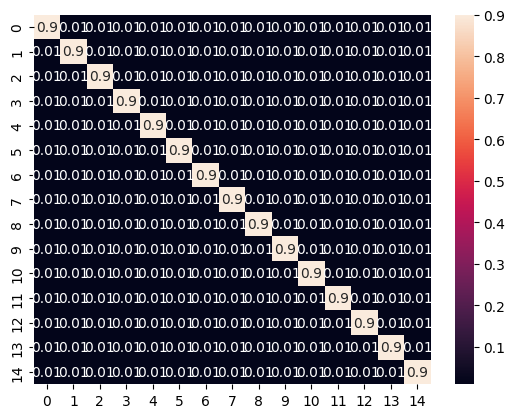

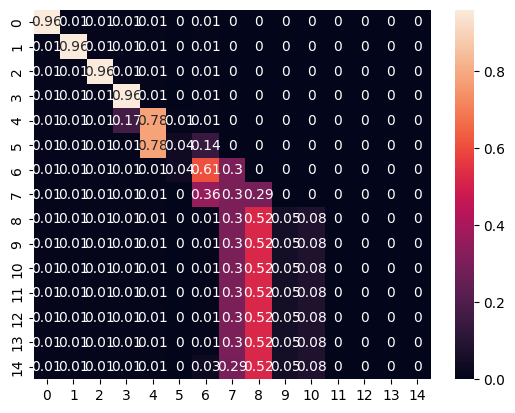

5.3999999999999995


/Users/sandarujayawardana/Documents/Python_code/.venv/lib/python3.11/site-packages/cvxpy/problems/problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


5.3999999999999995


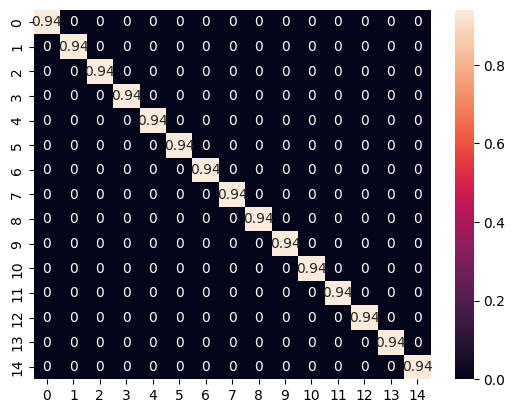

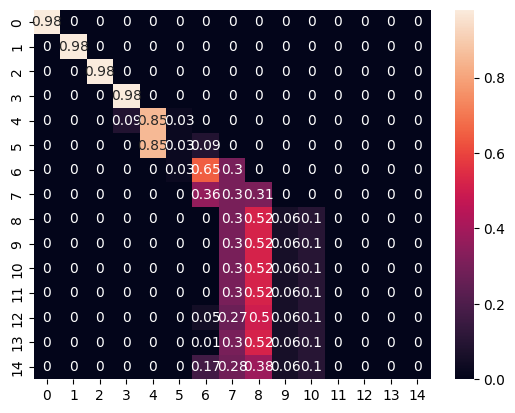

In [29]:
eps_array = np.arange(10)*0.6

sns.heatmap(np.reshape(prior_dist, (-1, 1)), annot=True)#, vmin=0.0, vmax=0.9)
plt.show()

for eps in eps_array:
    rr_mechanism_ = rr_mechanism.get_mechanism(eps=eps)
    optimal_mechanim_ = optimal_rr_mechanism.get_mechanism(eps=eps)

    print(eps)
    # print(rr_mechanism_)
    # print(optimal_mechanim_)

    sns.heatmap(np.around(rr_mechanism_, decimals=2), annot=True)
    plt.show()

    
    # print(type(optimal_mechanim_))
    sns.heatmap(np.around(optimal_mechanim_, decimals=2), annot=True)#, vmin=0.0, vmax=0.9)
    plt.show()
        

In [8]:
rr_mutual_info = []
optimized_rr_mutual_info = []

original_values = []

for i in read_data[START_INDEX:END_INDEX]:
    original_values.append([int(j) for j in i.split(" ")[1:]])
original_values = np.array(original_values)
for eps in eps_array:
    # print(eps)
    optimizaed_rr_perturbed_output_list = []
    rr_perturbed_output_list = []

    for i in read_data[START_INDEX:END_INDEX]:
        optimizaed_rr_perturbed_output_list.append([int(j) for j in optimal_rr_mechanism.gen_random_output(actual_value=i, eps=eps)[0].split(" ")[1:]])
        rr_perturbed_output_list.append([int(j) for j in rr_mechanism.gen_random_output(actual_value=i, eps=eps)[0].split(" ")[1:]])
    optimizaed_rr_perturbed_output_list = np.array(optimizaed_rr_perturbed_output_list)
    rr_perturbed_output_list = np.array(rr_perturbed_output_list)
    optimized_inner_list = []
    rr_inner_list = []
    for i in range(len(original_values[0])):
        optimized_empirical_data = np.reshape(np.array((original_values[:,i], optimizaed_rr_perturbed_output_list[:,i])), (-1,2))
        rr_empirical_data = np.reshape(np.array((original_values[:,i], rr_perturbed_output_list[:,i])), (-1,2))
        # print(np.shape(empirical_data))
        # print(empirical_data)

        # optimized_inner_list.append(pair_wise_mutual_info(optimized_empirical_data))
        # rr_inner_list.append(pair_wise_mutual_info(rr_empirical_data))
        optimized_inner_list.append(mutual_info_cal(optimized_empirical_data[:,0], optimized_empirical_data[:,1]))
        rr_inner_list.append(mutual_info_cal(rr_empirical_data[:,0], rr_empirical_data[:,1]))
    optimized_rr_mutual_info.append(optimized_inner_list)
    rr_mutual_info.append(rr_inner_list)
print(rr_mutual_info)

0.0
0.04616672004093081 [[-1 -1]
 [-1  1]
 [ 1 -1]
 [ 1  1]] [0.66975278 0.12052772 0.12159246 0.08812704] [[-1]
 [ 1]] [0.7902805 0.2097195] [[-1]
 [ 1]] [0.79134525 0.20865475]
6.95450962662214e-05 [[-1 -1]
 [-1  1]
 [ 1 -1]
 [ 1  1]] [0.29496256 0.24546955 0.2463157  0.2132522 ] [[-1]
 [ 1]] [0.5404321 0.4595679] [[-1]
 [ 1]] [0.54127826 0.45872174]
3.957198758125502e-05 [[-1 -1]
 [-1  1]
 [ 1 -1]
 [ 1  1]] [9.77619202e-01 1.07814241e-02 1.13807838e-02 2.18590024e-04] [[-1]
 [ 1]] [0.98840063 0.01159937] [[-1]
 [ 1]] [0.98899999 0.01100001]
0.05842064253775936 [[-1 -1]
 [-1  1]
 [ 1 -1]
 [ 1  1]] [0.60306167 0.13589248 0.13616748 0.12487837] [[-1]
 [ 1]] [0.73895415 0.26104585] [[-1]
 [ 1]] [0.73922915 0.26077085]
0.2
0.04616283438991098 [[-1 -1]
 [-1  1]
 [ 1 -1]
 [ 1  1]] [0.66974573 0.12053477 0.12159246 0.08812704] [[-1]
 [ 1]] [0.7902805 0.2097195] [[-1]
 [ 1]] [0.79133819 0.20866181]
0.00011293032671133574 [[-1 -1]
 [-1  1]
 [ 1 -1]
 [ 1  1]] [0.29673243 0.24398877 0.24629455 

In [70]:
rr_mutual_info[0]

[(3.1610893766576e-05,
  array([[0, 0],
         [0, 1],
         [1, 0],
         [1, 1]]),
  array([0.29394717, 0.24694327, 0.24646378, 0.21264579]),
  array([[0],
         [1]]),
  array([0.54089044, 0.45910956]),
  array([[0],
         [1]]),
  array([0.54041095, 0.45958905])),
 (0.0038180995666876605,
  array([[0, 0],
         [0, 1],
         [1, 0],
         [1, 1]]),
  array([0.41661848, 0.21569899, 0.21542399, 0.15225853]),
  array([[0],
         [1]]),
  array([0.63231748, 0.36768252]),
  array([[0],
         [1]]),
  array([0.63204248, 0.36795752]))]

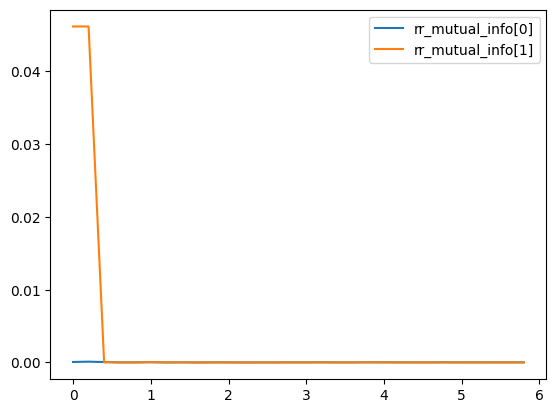

In [9]:
plt.plot(eps_array, np.array(rr_mutual_info)[:,0])
# plt.plot(eps_array, np.array(rr_mutual_info)[:,1])
plt.plot(eps_array, np.array(optimized_rr_mutual_info)[:,0])
# plt.plot(eps_array, np.array(optimized_rr_mutual_info)[:,1])

plt.legend(["rr_mutual_info[0]", "rr_mutual_info[1]", "optimized_rr_mutual_info[0]", "optimized_rr_mutual_info[1]"])

In [ ]:
'''
    Synthetic Distribution bias
'''
sample_count_per_sample = 2
synthetic_dist = Gen_Synthetic_Distribution(original_dist=prior_dist, no_samples=9, sample_count_per_sample=sample_count_per_sample)
synthetic_dist.create_distribution()
synthetic_distribution_dict = synthetic_dist.get_synthetic_distribution()

for i in synthetic_distribution_dict.keys():
    print(len(synthetic_distribution_dict[i]))

plot_data = np.zeros((len(list(synthetic_distribution_dict.keys())), len(eps_array)))
# count_data = np.zeros((len(list(synthetic_distribution_dict.keys())), len(eps_array)))
# print(np.shape(plot_data))
for k, eps in enumerate(eps_array):
    for i, key_ in enumerate(synthetic_distribution_dict.keys()):
        synthetic_distribution_list = synthetic_distribution_dict[key_]
        # print(synthetic_distribution_list)
        count_ = 0
        for j, elem in enumerate(synthetic_distribution_list):
            print(i, j)
            plot_data[i][k] += optimal_rr_mechanism.get_expected_utility_error(eps=eps, input_probability=elem)
            count_ += 1
        
        if count_ != 0:
            plot_data[i][k] = plot_data[i][k] / count_


1
0
0
0
2
2
2
0
0
0
0 0
0.0
var  0.6374949377147473
Expected val  0.7975012026564787
4 0
4 1
5 0
5 1
6 0
6 1
0 0
0.25
var  0.5417206626286392
Expected val  0.7925504422709826
4 0
4 1
5 0
5 1
6 0
6 1
0 0
0.5
var  0.5235817678886877
Expected val  0.7703052444267102
4 0
4 1
5 0
5 1
6 0
6 1
0 0
0.75
var  0.46380199932645416
Expected val  0.7468053791597378
4 0
4 1
5 0
5 1
6 0
6 1
0 0
1.0
var  0.4039090782000926
Expected val  0.7139724081878728
4 0
4 1
5 0
5 1
6 0
6 1
0 0
1.25
var  0.336181285597975
Expected val  0.67157246638227
4 0
4 1
5 0
5 1
6 0
6 1
0 0
1.5
var  0.2919403065280465
Expected val  0.6275802481195762
4 0
4 1
5 0
5 1
6 0
6 1
0 0
1.75
var  0.2536961894884219
Expected val  0.5842049351580195
4 0
4 1
5 0
5 1
6 0
6 1
0 0
2.0
var  0.222118571925075
Expected val  0.5427274828614898
4 0
4 1
5 0
5 1
6 0
6 1
0 0
2.25
var  0.19716564404372727
Expected val  0.5042100571566217
4 0
4 1
5 0
5 1
6 0
6 1
0 0
2.5
var  0.12839681945025705
Expected val  0.4649620580645255
4 0
4 1
5 0
5 1
6 0
6

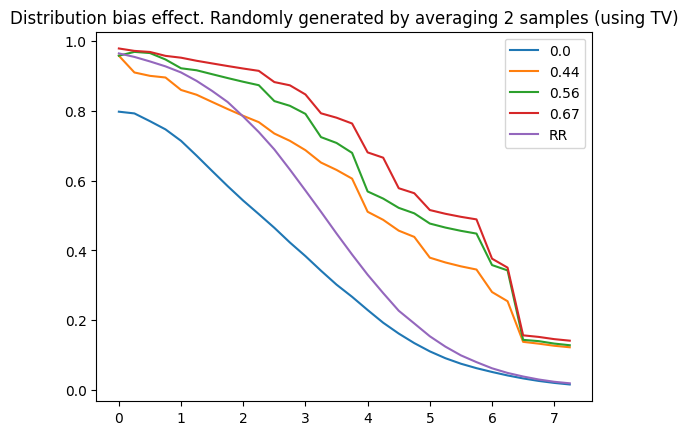

In [ ]:
legend_list = []
for i in range(len(list(synthetic_distribution_dict.keys()))):
    if np.sum(plot_data[i,:]) == 0:
        continue
    plt.plot(eps_array, plot_data[i,:])
    legend_list.append(list(synthetic_distribution_dict.keys())[i])
plt.plot(rr_eps_array, rr_error_list)
legend_list.append("RR")
plt.title(f"Distribution bias effect. Randomly generated by averaging {sample_count_per_sample} samples (using TV)")
plt.legend(legend_list)

In [ ]:
'''
    Synthetic Distribution bias
'''

synthetic_dist = Gen_Synthetic_Distribution(original_dist=prior_dist, no_samples=30)
synthetic_dist.create_distribution_away()
synthetic_distribution_dict = synthetic_dist.get_synthetic_distribution()

for i in synthetic_distribution_dict:
    print(i)

plot_data = np.zeros((len(list(synthetic_distribution_dict)), len(eps_array)))
# count_data = np.zeros((len(list(synthetic_distribution_dict.keys())), len(eps_array)))
# print(np.shape(plot_data))
for k, eps in enumerate(eps_array):
    for i, synthetic_distribution_list in enumerate(synthetic_distribution_dict):
        print(synthetic_distribution_list)
        
        print(i, k)
        plot_data[i][k] += optimal_rr_mechanism.get_expected_utility_error(eps=eps, input_probability=synthetic_distribution_list)
         

[ 0.17959631  0.01527417  0.13215382  0.21918239  0.01233684 -0.00189916
  0.04984345  0.01344445  0.02662171  0.03200229  0.11666362  0.10985509
  0.04612428  0.01401997  0.02852202  0.01571396 -0.00085128  0.00435556
  0.00689111 -0.0005798  -0.00067211 -0.00107931 -0.00163855 -0.0017037
 -0.003566   -0.00350628 -0.00356057 -0.00354428]


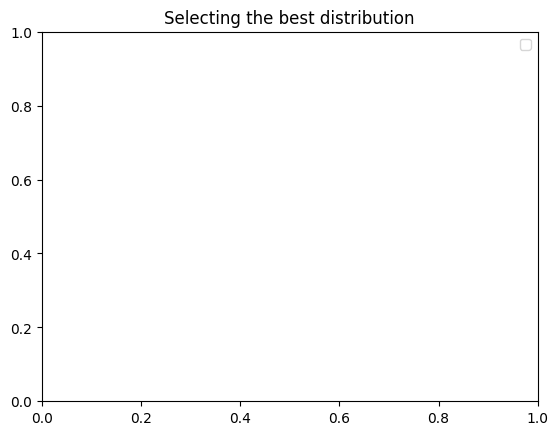

In [ ]:
legend_list = []
for i in range(len(synthetic_distribution_dict)):
    if np.sum(plot_data[i,:]) == 0:
        continue
    plt.plot(eps_array, plot_data[i,:])
    legend_list.append(f"Distance from original away from uniform = {i}")
# plt.plot(rr_eps_array, rr_error_list)
# legend_list.append("RR")
plt.title("Selecting the best distribution")
plt.legend(legend_list)

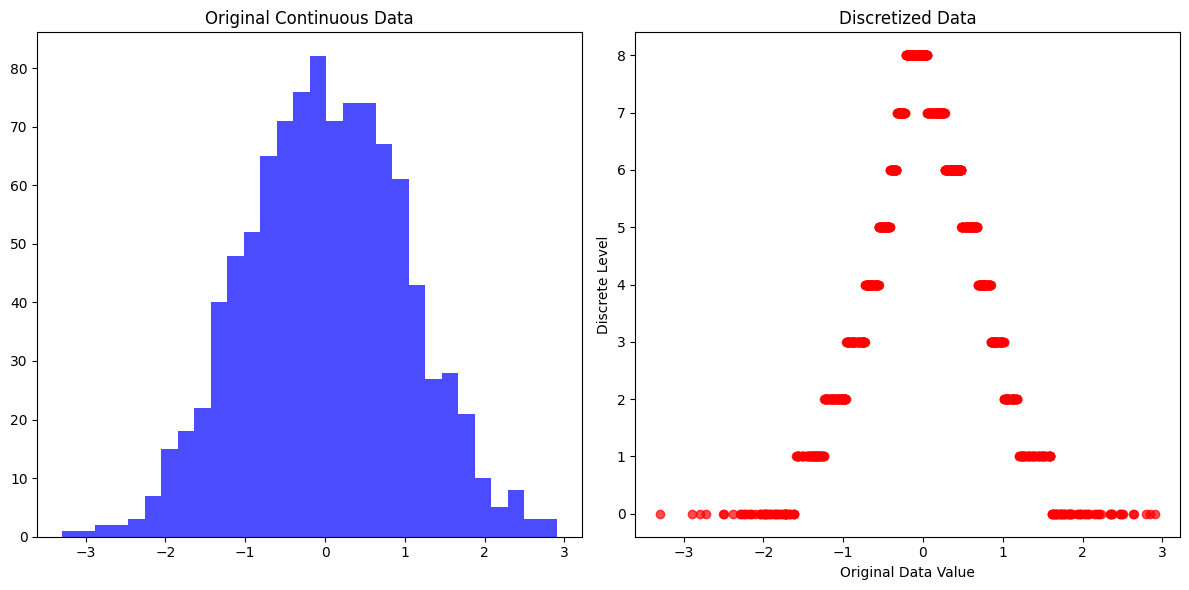

In [ ]:
import numpy as np
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt

def discretize_by_density(data, num_levels):
    # Kernel density estimation
    density = gaussian_kde(data)
    density_values = density(data)

    # Percentile-based thresholds for higher resolution in denser areas
    thresholds = np.percentile(density_values, np.linspace(0, 100, num_levels))

    # Assign discrete values
    discrete_data = np.zeros(data.shape, dtype=int)
    for i in range(1, num_levels):
        discrete_data += (density_values > thresholds[i])

    return discrete_data, density_values

# Example usage
data = np.random.normal(0, 1, 1000)
num_levels = 10
discrete_data, density_values = discretize_by_density(data, num_levels)

# Visualization
plt.figure(figsize=(12, 6))

# Original Data
plt.subplot(1, 2, 1)
plt.hist(data, bins=30, alpha=0.7, color='blue')
plt.title("Original Continuous Data")

# Discretized Data
plt.subplot(1, 2, 2)
plt.scatter(data, discrete_data, c='red', alpha=0.7)
plt.title("Discretized Data")
plt.xlabel("Original Data Value")
plt.ylabel("Discrete Level")

plt.tight_layout()
plt.show()


In [20]:
import numpy as np

def rappor_encode(value, num_states, prob_f, prob_p, prob_q):
    """
    Encode a value using RAPPOR.

    :param value: The original value (0 to num_states-1).
    :param num_states: The number of possible states for the attribute.
    :param prob_f: Probability of bit flipping in PRR (Permanent Randomized Response).
    :param prob_p: Probability of bit being 1 in IRR (Instantaneous Randomized Response) regardless of PRR.
    :param prob_q: Probability of bit being 1 in IRR if it was 1 in PRR.
    :return: A RAPPOR-encoded bit vector.
    """
    # PRR: Generate a permanent randomized response
    prr = np.random.rand(num_states) < prob_f
    prr_value = (prr ^ (np.arange(num_states) == value)).astype(int)

    # IRR: Generate an instantaneous randomized response
    irr = np.random.rand(num_states) < np.where(prr_value, prob_q, prob_p)
    
    return irr

# Parameters for RAPPOR
num_states = 4  # Number of states for each attribute
prob_f = 0.3    # Probability of bit flipping in PRR
prob_p = 0.5    # Probability of bit being 1 in IRR regardless of PRR
prob_q = 0.75   # Probability of bit being 1 in IRR if it was 1 in PRR

# Example user data (index of the preferred option for each attribute)
user_data = [0, 1, 2, 3]  # e.g., Red, Sushi, Pop, Tennis

# Encode each attribute using RAPPOR

for i in range(10):
    encoded_data = [rappor_encode(value, num_states, prob_f, prob_p, prob_q) for value in user_data]

    print("Encoded Data:", encoded_data)


Encoded Data: [array([ True, False,  True, False]), array([False,  True,  True,  True]), array([ True,  True,  True, False]), array([False, False, False,  True])]
Encoded Data: [array([ True,  True,  True,  True]), array([ True,  True, False,  True]), array([False,  True,  True,  True]), array([ True,  True,  True,  True])]
Encoded Data: [array([ True,  True,  True,  True]), array([False,  True,  True,  True]), array([ True, False,  True,  True]), array([ True, False,  True,  True])]
Encoded Data: [array([False,  True, False, False]), array([False,  True,  True,  True]), array([ True, False, False,  True]), array([ True, False,  True, False])]
Encoded Data: [array([False,  True,  True,  True]), array([False,  True,  True,  True]), array([False,  True,  True,  True]), array([False,  True,  True,  True])]
Encoded Data: [array([ True,  True,  True,  True]), array([ True,  True, False, False]), array([ True,  True, False, False]), array([False, False, False, False])]
Encoded Data: [array([